In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import get_fin_data as gfd
from pairs_methods import distance_approach as dist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtest 
import data_base as db
import os

In [34]:
petr = gfd.get_close_price("PETR4.SA", "2021-01-01")
print(petr.head())

[*********************100%***********************]  1 of 1 completed
Date
2021-01-04    13.732212
2021-01-05    14.268964
2021-01-06    14.297462
2021-01-07    14.724961
2021-01-08    14.781960
Name: Adj Close, dtype: float64


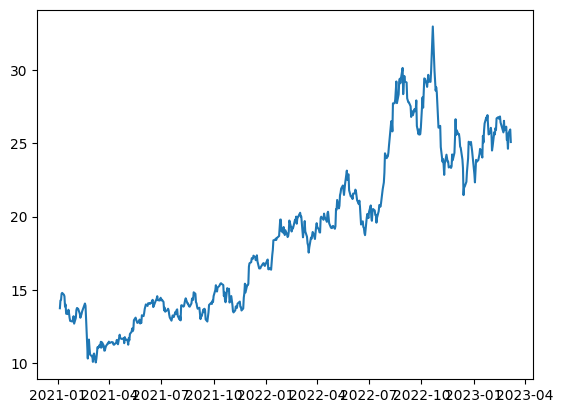

In [35]:
fig, ax = plt.subplots()
ax.plot(petr.index, petr)
plt.show()

In [3]:
# create random series to simulate and test functions

x = np.random.randn(375)/100
x = np.cumprod(1 + x)
x *= 5
x = pd.Series(x)

y = np.random.randn(375)/100
y = np.cumprod(1 + y) 
y *= 6
y = pd.Series(y)

print(x.head())
print(y.head())

0    5.042057
1    5.035176
2    5.070222
3    5.049750
4    5.003697
dtype: float64
0    6.014804
1    6.007868
2    5.883881
3    5.926144
4    5.878013
dtype: float64


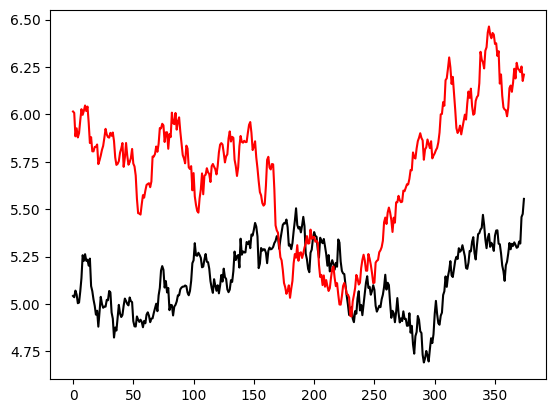

In [4]:
### plot series
fig, ax = plt.subplots()
ax.plot(x.index, x, color="black")
ax.plot(y.index, y, color="red")
plt.show()

In [5]:
x_train, x_test = backtest.split_train_test(x, 0.7)
y_train, y_test = backtest.split_train_test(y, 0.7)

print(x_train, x_test)

0      5.042057
1      5.035176
2      5.070222
3      5.049750
4      5.003697
         ...   
258    5.089172
259    5.153835
260    5.075644
261    5.111645
262    5.099422
Length: 263, dtype: float64 262    5.099422
263    5.005021
264    4.926643
265    4.963647
266    4.950927
         ...   
370    5.328814
371    5.318345
372    5.458427
373    5.474494
374    5.553949
Length: 113, dtype: float64
0      6.014804
1      6.007868
2      5.883881
3      5.926144
4      5.878013
         ...   
258    5.430504
259    5.455529
260    5.421677
261    5.481952
262    5.508142
Length: 263, dtype: float64 262    5.508142
263    5.482808
264    5.443431
265    5.379564
266    5.454834
         ...   
370    6.234362
371    6.222371
372    6.252171
373    6.175896
374    6.209298
Length: 113, dtype: float64


In [21]:
x_train_norm, x_test_norm = dist.normalize_series(x_train, x_test)
y_train_norm, y_test_norm = dist.normalize_series(y_train, y_test)

print(y_train_norm, y_test_norm)


0      0.971432
1      0.965201
2      0.853814
3      0.891782
4      0.848542
         ...   
258    0.446511
259    0.468993
260    0.438581
261    0.492730
262    0.516259
Length: 263, dtype: float64 262    0.516259
263    0.493499
264    0.458125
265    0.400748
266    0.468368
         ...   
370    1.168677
371    1.157906
372    1.184677
373    1.116153
374    1.146160
Length: 113, dtype: float64


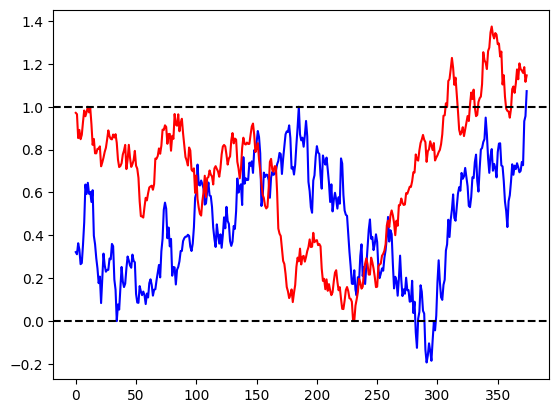

In [23]:
x_train_test_norm = pd.concat([x_train_norm, x_test_norm], axis=0)
y_train_test_norm = pd.concat([y_train_norm, y_test_norm], axis=0)

fig, ax = plt.subplots()
ax.plot(x_train_test_norm, color="blue")
ax.plot(y_train_test_norm, color="red")
ax.axhline(0, color="black", linestyle="dashed")
ax.axhline(1, color="black", linestyle="dashed")
plt.show()

In [28]:
spread_train = dist.spread_distance(x_train_norm, y_train_norm)
spread_test = dist.spread_distance(x_test_norm, y_test_norm)

z_score_train, z_score_test = dist.z_score(spread_train, spread_test)
z_score_train_test = pd.concat([z_score_train, z_score_test], axis=0)

print(z_score_train_test)



0     -2.519432
1     -2.537457
2     -1.777698
3     -2.095044
4     -2.208531
         ...   
370   -1.476776
371   -1.498177
372   -0.664097
373   -0.234314
374    0.169607
Length: 376, dtype: float64


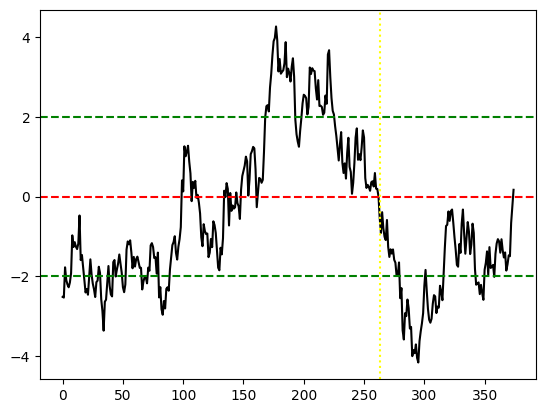

In [31]:

fig, ax = plt.subplots()
ax.plot(z_score_train_test, color="black")
ax.axhline(0, color="red", linestyle="dashed")
ax.axhline(2, color="green", linestyle="dashed")
ax.axhline(-2, color="green", linestyle="dashed")
ax.axvline(len(z_score_train_test)*0.7, color="yellow", linestyle="dotted")
plt.show()